In [16]:
import numpy as np
import numpy

In [17]:
import matplotlib.pyplot as plt

In [18]:
from scipy import integrate

In [19]:
import sympy

In [20]:
sympy.init_printing()

In [21]:
def f(t, y, args):
    R, r, g, sigma, delta = args
    return [y[1], sympy.sqrt(2*g*(y[0]-y[2])/(R**2/sigma/r**2)**2 + (R**2/(R-delta)**2)**2-1),
    y[3], sympy.sqrt(2*g*(y[0]-y[2])/((R-delta)**2/sigma/r**2)**2+1-((R-delta)**2/R**2)**2)
    ]
    # return [y[1], sympy.sqrt(2*g*(y[0]-y[2])/((R-delta)**2/sigma/r**2)**2+1-((R-delta)**2/R**2)**2),
    # y[3], sympy.sqrt(2*g*(y[0]-y[2])/((R**2/sigma/r**2)**2 + (R**2/(R-delta)**2)**2-1)) 
    # ]

In [22]:
R, r, g, sigma, delta = 0.10, 0.02, 9.8, 0.15, 0.002

In [23]:
args = (R, r, g, sigma, delta)

In [24]:
y0 = [0.1, 0, 0, 0]

In [25]:
t = np.linspace(0, 100, 100)

In [26]:
r = integrate.ode(f)

In [27]:
r.set_integrator('lsoda')
r.set_initial_value(y0, t[0])
r.set_f_params(args)

In [28]:
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))

In [29]:
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

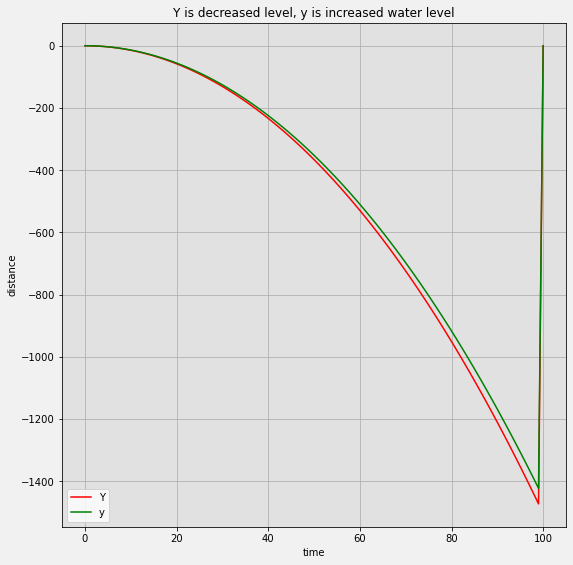

In [30]:
fig = plt.figure (figsize=(10, 10), facecolor='#f1f1f1')
left, bottom, width, height = 0.7, 0.7, 0.7, 0.7
ax = fig.add_axes((left, bottom, width, height), facecolor='#e1e1e1')
ax.plot(t, -y[:,0],  'r', label='Y')
ax.plot(t, -y[:,2], 'g', label = 'y')
ax.set_xlabel('time')
ax.set_ylabel('distance')
ax.set_title('Y is decreased level, y is increased water level')
ax.legend()
ax.grid()